# Assignment8

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/shivsurya-s/Task_6/main/Dataset/car_data.csv")

In [43]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [44]:
df.shape

(804, 12)

## Tasks, Part 1

In [45]:
x=df[["Mileage"]]
y=df["Price"]

In [46]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [47]:
c=model.intercept_
m=model.coef_


In [48]:
y_pred = model.predict(x)

1. Find the linear regression equation for mileage vs price.

In [49]:
print('The Linear Equation is: y= ',m,'x+',c)

The Linear Equation is: y=  [-0.1725205] x+ 24764.559006061685


2. Chart the original data and the equation on the chart.

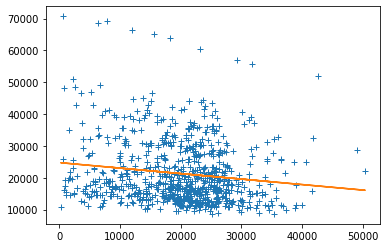

In [50]:
plt.plot(x,y,'+')
plt.plot(x,y_pred)

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [51]:
score=model.score(x,y)
print(score)
print(score*100,"%")

0.02046344732348926
2.046344732348926 %


It is not a good fit for this data.

## Tasks, Part 2

In [52]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [53]:
X=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y=df["Price"]

In [54]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [55]:
c=model.intercept_
m=model.coef_

In [56]:
y_pred = model.predict(X)

In [57]:
print('The Linear Equation is: y= ',m,'x+',c)

The Linear Equation is: y=  [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] x+ 6758.755143598106


2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [58]:
score=model.score(X,y)
print(score)
print(score*100,"%")

0.4462643536728379
44.62643536728379 %


It has weaker correlation and not a good fit

3. Find the combination of the factors that is the best predictor for price.

In [59]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [60]:
a1=df[['Mileage']]
a6=df[['Cylinder']]
a7=df[['Liter']]
a8=df[['Doors']]
a9=df[['Cruise']]
a10=df[['Sound']]
a11=df[['Leather']]
b=df['Price']

In [61]:
model1=model.fit(a1,b)
print('Mileage:',model.score(a1,b)*100)
model2=model.fit(a6,b)
print('Cylinder:',model.score(a6,b)*100)
model3=model.fit(a7,b)
print('Liter:',model.score(a7,b)*100)
model4=model.fit(a8,b)
print('Doors:',model.score(a8,b)*100)
model5=model.fit(a9,b)
print('Cruise:',model.score(a9,b)*100)
model6=model.fit(a10,b)
print('Sound:',model.score(a10,b)*100)
model7=model.fit(a11,b)
print('Leather:',model.score(a11,b)*100)

Mileage: 2.046344732348926
Cylinder: 32.385903759512246
Liter: 31.152674427904504
Doors: 1.9251466591467037
Cruise: 18.563300929692762
Sound: 1.5462387624189389
Leather: 2.4710851264124534


Cylinder and Liter are the best combination

##Task,Part3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [62]:
df=pd.get_dummies(df,columns=['Make','Model','Type'])

In [63]:
df

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


2. Find the best combination of factors to predict price.

In [64]:
a1=df[['Mileage']]
a6=df[['Cylinder']]
a7=df[['Liter']]
a8=df[['Doors']]
a9=df[['Cruise']]
a10=df[['Sound']]
a11=df[['Leather']]
b=df['Price']

In [65]:
model1=model.fit(a1,b)
print('Mileage:',model.score(a1,b)*100)
model2=model.fit(a6,b)
print('Cylinder:',model.score(a6,b)*100)
model3=model.fit(a7,b)
print('Liter:',model.score(a7,b)*100)
model4=model.fit(a8,b)
print('Doors:',model.score(a8,b)*100)
model5=model.fit(a9,b)
print('Cruise:',model.score(a9,b)*100)
model6=model.fit(a10,b)
print('Sound:',model.score(a10,b)*100)
model7=model.fit(a11,b)
print('Leather:',model.score(a11,b)*100)

Mileage: 2.046344732348926
Cylinder: 32.385903759512246
Liter: 31.152674427904504
Doors: 1.9251466591467037
Cruise: 18.563300929692762
Sound: 1.5462387624189389
Leather: 2.4710851264124534



Cylinder and Liter are the best combination